<a href="https://colab.research.google.com/github/whitedevil3636/DLProjects/blob/main/IMDB_Sentimant_Analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix,classification_report
from keras import layers

# Load Dataset


In [ ]:
df = pd.read_csv("/content/IMDB Dataset.csv")
df = df.sample(n=5000).reset_index(drop=True)
df

,review,sentiment
0,Seeing a photo of a man being attacked by zomb...,negative
1,This film is like a dirge. UNTIL it gets to mu...,positive
2,"So, Madonna isn't Meryl Streep. Still, this is...",positive
3,For movie fans who have never heard of the boo...,negative
4,So you're a giant mantis and you've been hangi...,negative
...,...,...
4995,"I really like Miikes movies about Yakuza, this...",positive
4996,"I only wish that Return of the Jedi, have been...",positive
4997,"Strikes me as routine, as far as TV movies go....",negative
4998,Screwball comedy about romantic mismatches in ...,positive


# Process Data

In [ ]:
#text cleaning
# 1. Lower Casing
# 2. Keep letter only
# 3. Remove stopwords
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download NLTK resources (only the first time)
nltk.download('stopwords')

# Initialize the stemmer and stopwords list
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def clean_review_with_stopwords_and_stemming(review):
    # Decode HTML entities (like <br /> to actual line breaks)
    review = html.unescape(review)

    # Remove HTML tags (e.g., <br />)
    review = re.sub(r'<.*?>', '', review)

    # Convert to lowercase
    review = review.lower()

    # Remove non-alphabetic characters and digits
    review = re.sub(r'[^a-z\s]', '', review)

    # Tokenization: Split the review into words
    words = review.split()

    # Remove stopwords and apply stemming
    cleaned_words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Rejoin the words back into a cleaned string
    cleaned_review = ' '.join(cleaned_words)

    return cleaned_review


# Assuming df is your DataFrame with reviews
df['review'] = df['review'].apply(clean_review_with_stopwords_and_stemming)

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,reviews
0,see photo man attack zombi gave hope lucio zom...,negative,see photo man attack zombi gave hope lucio zom...
1,film like dirg get music number like mind fck ...,positive,film like dirg get music number like mind fck ...
2,madonna isnt meryl streep still one first film...,positive,madonna isnt meryl streep still one first film...
3,movi fan never heard book shirley jackson haun...,negative,movi fan never heard book shirley jackson haun...
4,your giant manti youv hang arctic your tire es...,negative,your giant manti youv hang arctic your tire es...
...,...,...,...
4995,realli like miik movi yakuza one saw year ago ...,positive,realli like miik movi yakuza one saw year ago ...
4996,wish return jedi direct somebodi els mean far ...,positive,wish return jedi direct somebodi els mean far ...
4997,strike routin far tv movi go believ base true ...,negative,strike routin far tv movi go believ base true ...
4998,screwbal comedi romant mismatch new york citi ...,positive,screwbal comedi romant mismatch new york citi ...


# Encode

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['sentiment'] = encoder.fit_transform(df['sentiment'])
df

,review,sentiment,reviews
0,see photo man attack zombi gave hope lucio zom...,0,see photo man attack zombi gave hope lucio zom...
1,film like dirg get music number like mind fck ...,1,film like dirg get music number like mind fck ...
2,madonna isnt meryl streep still one first film...,1,madonna isnt meryl streep still one first film...
3,movi fan never heard book shirley jackson haun...,0,movi fan never heard book shirley jackson haun...
4,your giant manti youv hang arctic your tire es...,0,your giant manti youv hang arctic your tire es...
...,...,...,...
4995,realli like miik movi yakuza one saw year ago ...,1,realli like miik movi yakuza one saw year ago ...
4996,wish return jedi direct somebodi els mean far ...,1,wish return jedi direct somebodi els mean far ...
4997,strike routin far tv movi go believ base true ...,0,strike routin far tv movi go believ base true ...
4998,screwbal comedi romant mismatch new york citi ...,1,screwbal comedi romant mismatch new york citi ...


# Train Test SPlit

In [ ]:
RANDOM_STATE = 42
text_train, text_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=RANDOM_STATE)

# Tokenization

In [ ]:
text_train

,review
4227,movi charm account want life approv convent su...
4676,well mayb worst movi ever least worst movi eve...
800,bad movieand mean badth plot predict ealli che...
3671,wasnt expect lot film direct sidney j furi sta...
4193,simpson cours start christma special simpson r...
...,...
4426,mani cant help prais cast crew develop talespi...
466,cours read review seen film alreadi raja babu ...
3092,first saw movi releas us seen mani mani time s...
3772,skippi famili tie play eddi wussi metal nerd g...


In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
X_test = tokenizer.texts_to_sequences(text_test)

vocab_size = len(tokenizer.word_index) + 1
maxlen = max(len(seq) for seq in X_train)
maxlen,vocab_size


#adding padding to ensure all vectors have the same dimensionality
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

X_train


array([[    1,   631,  1415, ...,     0,     0,     0],
       [   21,   206,   184, ...,     0,     0,     0],
       [   23,  6326,   155, ...,     0,     0,     0],
       ...,
       [   31,   136,     1, ...,     0,     0,     0],
       [15441,   123,  1207, ...,     0,     0,     0],
       [  362,  1598,   213, ...,     0,     0,     0]], dtype=int32)

# CNN Architecture


In [ ]:
# Define CNN model
from tensorflow.keras.models import Sequential
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())


model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32,verbose=True)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 46s 341ms/step - accuracy: 0.5991 - loss: 0.6749 - val_accuracy: 0.7910 - val_loss: 0.4760
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 47s 373ms/step - accuracy: 0.8513 - loss: 0.3556 - val_accuracy: 0.8130 - val_loss: 0.3941
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 77s 331ms/step - accuracy: 0.9748 - loss: 0.1072 - val_accuracy: 0.8220 - val_loss: 0.4499
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 82s 334ms/step - accuracy: 0.9991 - loss: 0.0168 - val_accuracy: 0.8110 - val_loss: 0.5239
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 327ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.8200 - val_loss: 0.5365
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.8210 - val_loss: 0.5637
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 336ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8200 - val_loss: 0.5877
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 322ms/step - accuracy: 1.0000 - loss: 7

# Visualize


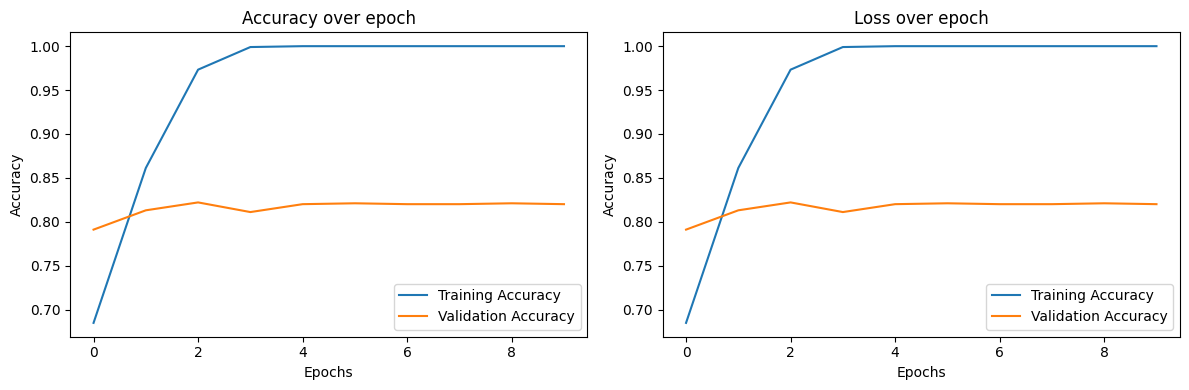

In [ ]:
import matplotlib.pyplot as plt
#accuracy plot
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over epoch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#loss plot
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Loss over epoch")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Display the plots
plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step
classification report 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       486
           1       0.82      0.84      0.83       514

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



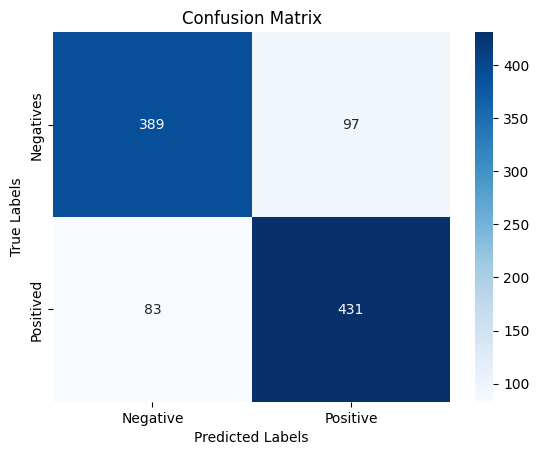

In [ ]:
import seaborn as sns
y_pred = model.predict(X_test)
Y_pred = (y_pred>0.5).astype(int)


print("classification report ")
print(classification_report(y_test,Y_pred))


#confusion matrix
conf_matrix = confusion_matrix(y_test,Y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Negative','Positive'],yticklabels=['Negatives','Positived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Predict script

In [ ]:
def predict_sentiment(review,tokenizer,model,maxlen):
  text = clean_review_with_stopwords_and_stemming(review)
  sequence = tokenizer.texts_to_sequences([text])
  padded_sequence = pad_sequences(sequence, padding='post', maxlen=maxlen)
  prediction = model.predict(padded_sequence)[0][0]

  if prediction > 0.5:
    return "Positive"
  else:
    return "Negative"


In [ ]:
input_text = "This movie is a veru bad film "
predict_sentiment(input_text,tokenizer,model,maxlen)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


'Negative'

# Saving the model

In [ ]:
model.save("CN_Sentiment_Analysis.h5")
import pickle

pickle.dump(tokenizer,open("tokenizer.pkl","wb"))